In [124]:
import os
import librosa
import wave
import matplotlib.pyplot as plt
import soundfile as sf

In [ ]:
#ciao belli

   FileName         Label                       Dataset
0  70025008  Bearded Seal  Watkins Marine Mammals Sound
1  71012002  Bearded Seal  Watkins Marine Mammals Sound
2  7801800J  Bearded Seal  Watkins Marine Mammals Sound
3  7202100V  Bearded Seal  Watkins Marine Mammals Sound
4  71012003  Bearded Seal  Watkins Marine Mammals Sound
Label
Spinner Dolphin     114
Fraser_s Dolphin     91
Humpback Whale       90
Striped Dolphin      85
Sperm Whale          79
                   ... 
Perch                 1
Ringed Seal           1
Dolphin               1
Bar jack              1
Toadfish              1
Name: count, Length: 96, dtype: int64


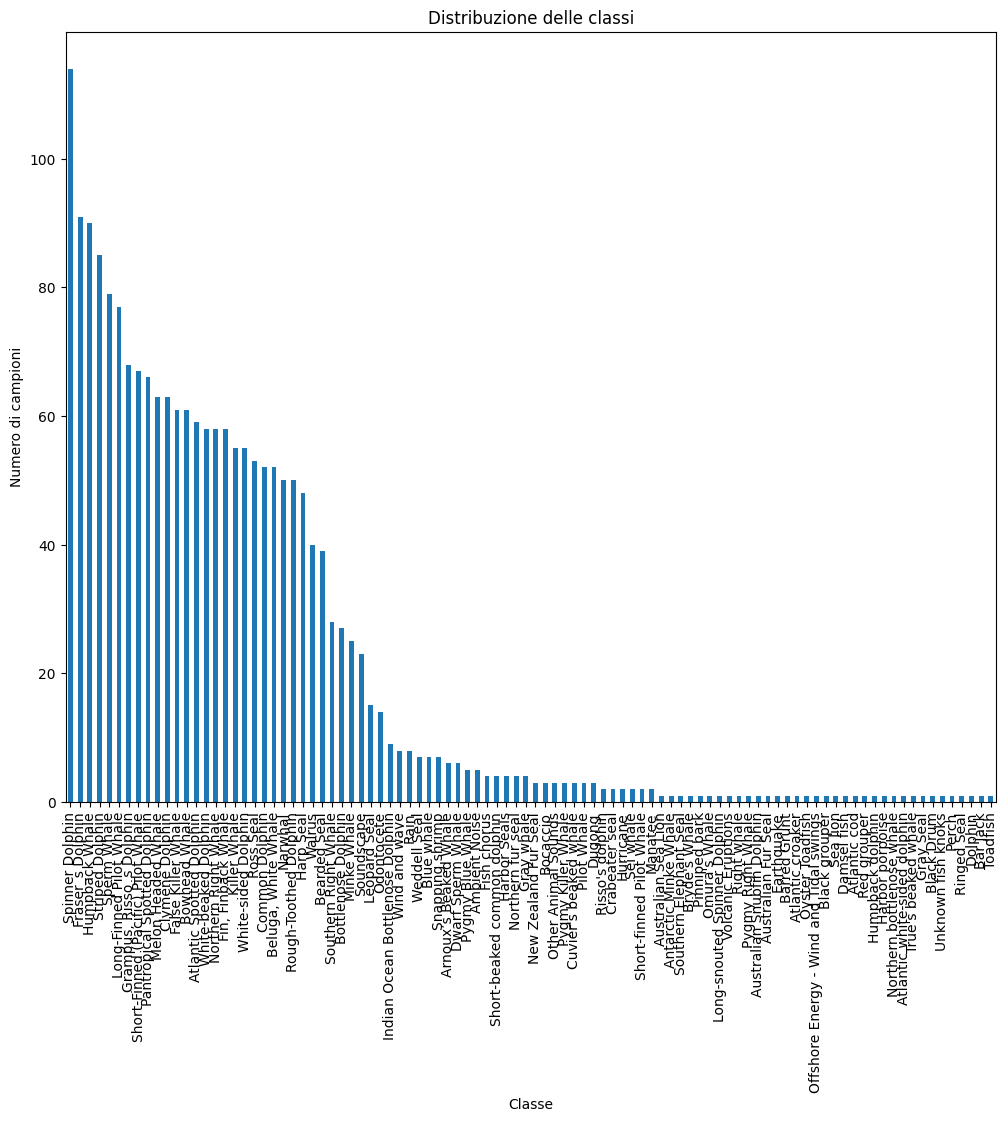

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset/Non-Target/metadata-NonTarget.csv")
# Visualizza le prime righe del DataFrame
print(df.head())

# Conta il numero di campioni per ogni classe
print(df['Label'].value_counts())
# Esempio di grafico a barre delle classi nel dataset
plt.figure(figsize=(12, 10))
df['Label'].value_counts().plot(kind='bar')
plt.title('Distribuzione delle classi')
plt.xlabel('Classe')
plt.ylabel('Numero di campioni')
plt.show()

In [125]:
def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path, res_type=None, sr=None, mono=False)
    duration = librosa.get_duration(y=y, sr=sr)
    channels = 'Mono' if y.ndim == 1 else 'Stereo'
    return {'Audio': audio_path, 'Durata (s)': duration, 'Canali': channels, 'Frequenza di campionamento (Hz)': sr}



In [126]:
# Nel caso in cui volessimo dividere la ricerca tra target e non target, basta fare due for separati e passare 
# trargetpath e non target path al posto di dataset
target_path = 'Dataset/Target'
non_target_path = 'Dataset/Non-Target'

# Lista per memorizzare i percorsi dei file audio
audio_files = []

# Scorrere ricorsivamente le cartelle nel dataset
for root, dirs, files in os.walk('Dataset'):
    for file in files:
        if file.endswith(('.wav','.mp3')):
           audio_files.append(os.path.join(root, file))
audio_features = []
for file in audio_files:
    feature1 = extract_audio_features(file)
    audio_features.append(feature1)
print(audio_features)



[{'Audio': 'Dataset\\Non-Target\\Ambient Noise\\0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.mp3', 'Durata (s)': 31.207619047619048, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 44100}, {'Audio': 'Dataset\\Non-Target\\Ambient Noise\\2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61.mp3', 'Durata (s)': 31.207619047619048, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 44100}, {'Audio': 'Dataset\\Non-Target\\Ambient Noise\\2f574049-3325-446c-a8ac-2e5b31e9e32f.mp3', 'Durata (s)': 31.207619047619048, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 44100}, {'Audio': 'Dataset\\Non-Target\\Ambient Noise\\30679527-fd7a-4cad-8c7d-cb1bcc07604d.mp3', 'Durata (s)': 31.207619047619048, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 44100}, {'Audio': 'Dataset\\Non-Target\\Ambient Noise\\f9652ad2-39f5-41b4-a8e4-89171a864f03.mp3', 'Durata (s)': 31.207619047619048, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 44100}, {'Audio': 'Dataset\\Non-Target\\Antarctic Minke Whale\\Bioduck.wav', 'Dura

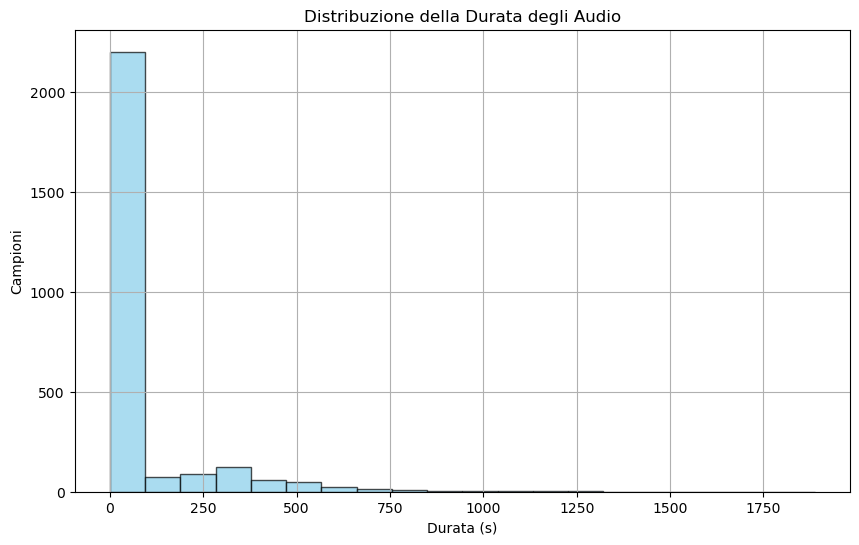

In [127]:
import matplotlib.pyplot as plt

durations = [feat['Durata (s)'] for feat in audio_features]

# Grafico della distribuzione della durata
plt.figure(figsize=(10, 6))
plt.hist(durations, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della Durata degli Audio')
plt.xlabel('Durata (s)')
plt.ylabel('Campioni')
plt.grid(True)
plt.show()

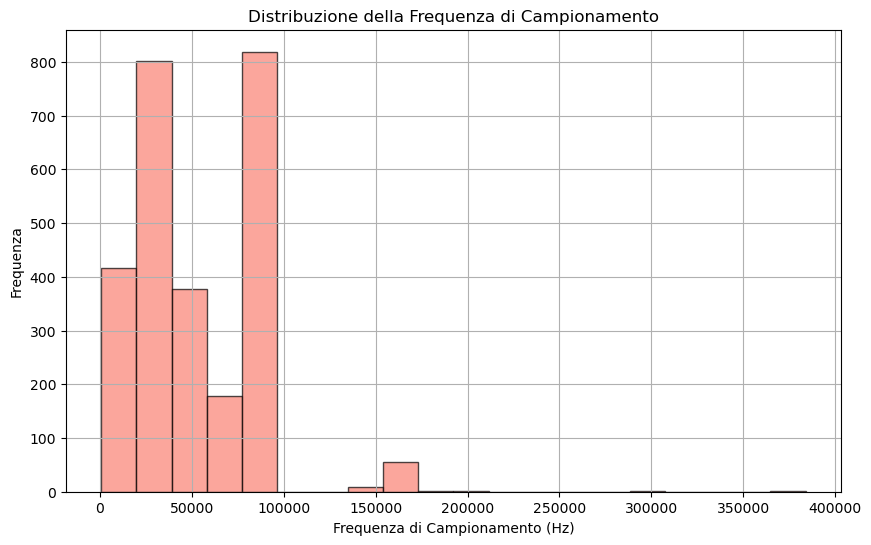

In [128]:
import matplotlib.pyplot as plt

frequencies = [feat['Frequenza di campionamento (Hz)'] for feat in audio_features]

# Grafico della distribuzione della frequenza di campionamento
plt.figure(figsize=(10, 6))
plt.hist(frequencies, bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della Frequenza di Campionamento')
plt.xlabel('Frequenza di Campionamento (Hz)')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

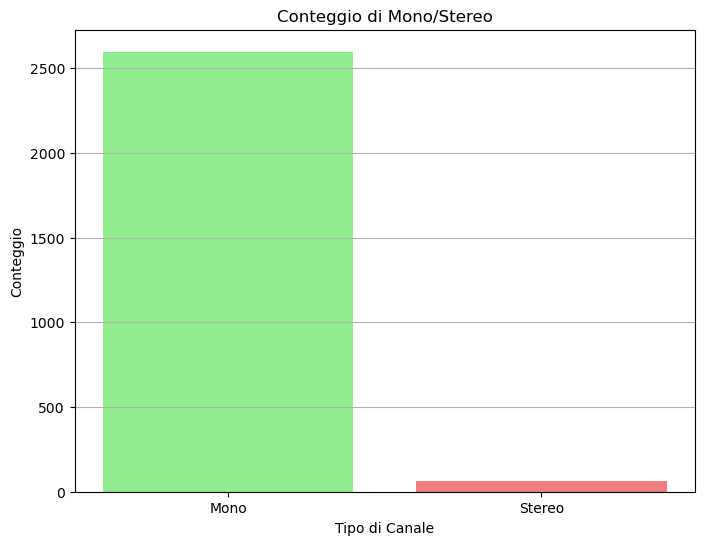

In [129]:
import matplotlib.pyplot as plt

channels = [feat['Canali'] for feat in audio_features]

# Grafico del conteggio di mono/stereo
plt.figure(figsize=(8, 6))
plt.bar(['Mono', 'Stereo'], [channels.count('Mono'), channels.count('Stereo')], color=['lightgreen', 'lightcoral'])
plt.title('Conteggio di Mono/Stereo')
plt.xlabel('Tipo di Canale')
plt.ylabel('Conteggio')
plt.grid(axis='y')
plt.show()

Errore durante l'apertura del file: Dataset\Non-Target\Dwarf Sperm Whale\burst-pulse-DSW_bullfrog-click-train.wav unknown format: 2
Errore durante l'apertura del file: Dataset\Non-Target\Dwarf Sperm Whale\click-trains-DSW_tic-tocs-and-clicks.wav unknown format: 2
Errore durante l'apertura del file: Dataset\Non-Target\Dwarf Sperm Whale\clicks-and-whistles-DSW_Rattelsnake-click-train.wav unknown format: 2
Errore durante l'apertura del file: Dataset\Non-Target\Dwarf Sperm Whale\DSW_whistles-and-rattles.wav unknown format: 2
Errore durante l'apertura del file: Dataset\Non-Target\Dwarf Sperm Whale\multipart-stepping-tonal-DSW_downsweep-rattle.wav unknown format: 2
Errore durante l'apertura del file: Dataset\Non-Target\Dwarf Sperm Whale\xzoom-whistle-2-DSW_whistles-and-slow-click-train.wav unknown format: 2
Errore durante l'apertura del file: Dataset\Non-Target\Fraser_s Dolphin\Lagenodelphis_hosei_FR_clicks-and-wolf-whistle.wav unknown format: 2
Errore durante l'apertura del file: Dataset\No

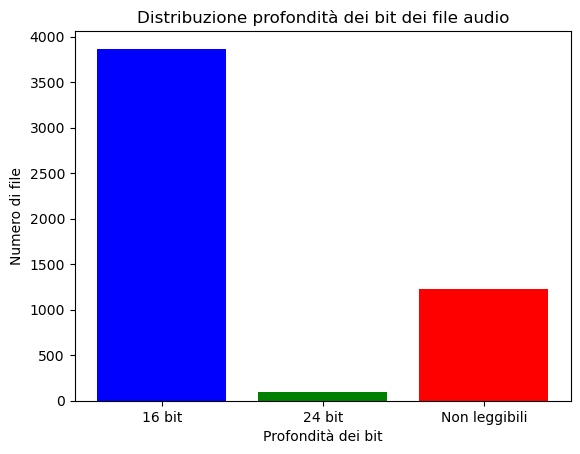

In [130]:
import wave

for root, dirs, files in os.walk('Dataset'):
    for file in files:
        if file.endswith(('.wav')):
           audio_files.append(os.path.join(root, file))

count_16bit=0
count_24bit=0
count_unreadable=0
for file in audio_files:
    if file.endswith('.wav'):
        
        try:
            with wave.open(file, 'rb') as audio_file:
                # Ottieni la profondità dei bit
                depth_bit = audio_file.getsampwidth() * 8
                if depth_bit ==16 : count_16bit+=1
                else: count_24bit+=1
        except Exception as e:
            print("Errore durante l'apertura del file:" ,file, e)
            count_unreadable+=1
            continue  # Passa al prossimo file
        #commit a caso
# Etichette delle colonne
labels = ['16 bit', '24 bit', 'Non leggibili']

# Dati da visualizzare nel grafico
data = [count_16bit, count_24bit, count_unreadable]

# Creazione del grafico a barre
plt.bar(labels, data, color=['blue', 'green', 'red'])

# Aggiunta di titolo e etichette
plt.title('Distribuzione profondità dei bit dei file audio')
plt.xlabel('Profondità dei bit')
plt.ylabel('Numero di file')

# Mostra il grafico
plt.show()